<h1>House Sales Data Analysis – USA County</h1>


In [1]:
# importing required libraries
import pandas as pd


C:\Users\vaish\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import numpy as np


In [3]:
pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.pipeline import Pipeline

In [7]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [8]:
from sklearn.linear_model import LinearRegression, Ridge

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
# reading file and creating a data frame

filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

In [48]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
#Display Data types
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [50]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [51]:

df = pd.read_csv(filepath)  


In [52]:
print(df.columns)


Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [53]:

# Drop the columns 
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

# Get statistical summary
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [54]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [55]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

C:\Users\vaish\AppData\Local\Temp\ipykernel_6368\4091211281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [56]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

C:\Users\vaish\AppData\Local\Temp\ipykernel_6368\1207139423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [57]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


In [58]:

# Count the number of houses with each unique 'floors' value
floor_counts = df['floors'].value_counts().to_frame()

# Rename the column for clarity (optional but useful)
floor_counts.columns = ['house_count']

# Display the result
print(floor_counts)

        house_count
floors             
1.0           10680
2.0            8241
1.5            1910
3.0             613
2.5             161
3.5               8


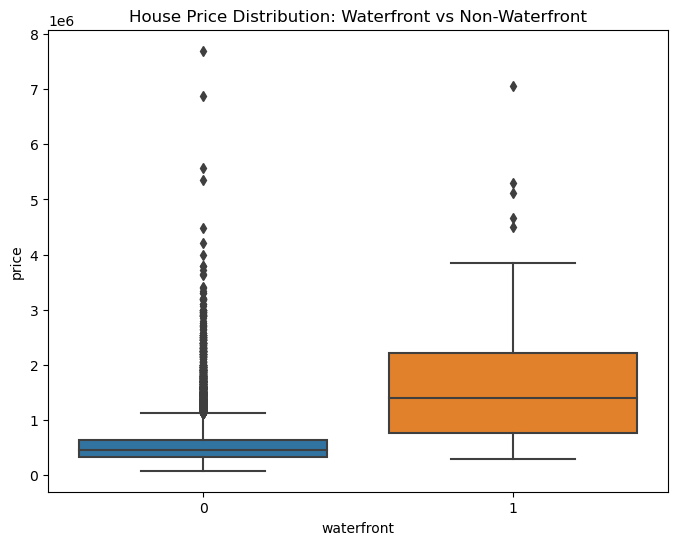

In [59]:

# Set figure size for clarity 
plt.figure(figsize=(8, 6))

# Create boxplot comparing price with waterfront status
sns.boxplot(x='waterfront', y='price', data=df)

# Add title
plt.title('House Price Distribution: Waterfront vs Non-Waterfront')

# Show the plot
plt.show()

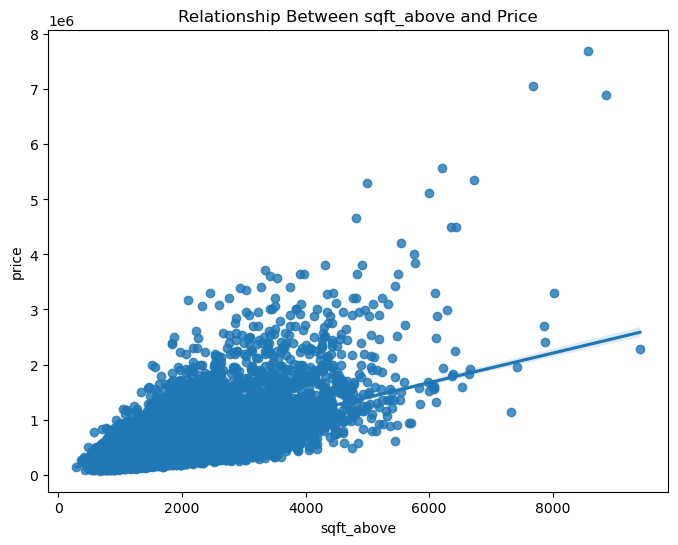

In [60]:

# Set figure size 
plt.figure(figsize=(8, 6))
# Use regplot to show the relationship between sqft_above and price
sns.regplot(x='sqft_above', y='price', data=df)
# Add title
plt.title('Relationship Between sqft_above and Price')
# Show plot
plt.show()

In [61]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [62]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [63]:
# A6
# Define feature and target 
X = df[['sqft_living']]
Y = df['price']

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X, Y)

# Get R² score
r2 = lm.score(X, Y)
print("R² score for sqft_living vs price:", r2)

R² score for sqft_living vs price: 0.4928532179037931


In [64]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", 
            "grade", "sqft_living"]


In [65]:
# A7
# Define input (X) and target (Y)
X = df[features]
Y = df['price']

# Create the linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Calculate R²
r2 = lm.score(X, Y)

# Output the R² score
print("R² score for multivariate linear regression:", r2)

R² score for multivariate linear regression: 0.6576377477292141


In [67]:
# A8
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Define the features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", 
            "grade", "sqft_living"]

# Input and output variables
X = df[features]
Y = df['price']

# Define the pipeline steps
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Create the pipeline object
pipe = Pipeline(Input)

# Fit the pipeline to the data
pipe.fit(X, Y)

# Calculate the R² score
r2 = pipe.score(X, Y)

# Print the R² score
print("R² score using pipeline with polynomial features:", r2)


R² score using pipeline with polynomial features: 0.7508095274002047


In [70]:
# A9
from sklearn.linear_model import Ridge

# Create Ridge regression object with alpha = 0.1
RidgeModel = Ridge(alpha=0.1)

# Fit the model using training data
RidgeModel.fit(x_train, y_train)

# Calculate the R² score on the test data
r2_ridge = RidgeModel.score(x_test, y_test)

# Print the R² score
print("R² score on test data using Ridge regression (alpha=0.1):", r2_ridge)


R² score on test data using Ridge regression (alpha=0.1): 0.6760807731582404


In [72]:
# A10
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Step 1: Apply 2nd order polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Step 2: Fit Ridge Regression with alpha=0.1
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_poly, y_train)

# Step 3: Calculate R² score on test data
r2_poly_ridge = RidgeModel.score(x_test_poly, y_test)

# Step 4: Print the R² score
print("R² score with 2nd order polynomial features and Ridge (alpha=0.1):", r2_poly_ridge)


R² score with 2nd order polynomial features and Ridge (alpha=0.1): 0.7835631107608146
